# Linear Regression with Real Data

## Import relevant modules

In [11]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load the .csv file into a pandas DataFrame

In [12]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first 5 rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


## Examine the dataset

In [13]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


## Define build and train model function

In [14]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), # optimizer that implements the RMSprop algorithm.
                loss="mean_squared_error", # computes the mean of squares of errors between labels and predictions.
                metrics=[tf.keras.metrics.RootMeanSquaredError()])  # computes root mean squared error metric between 
                                                                    # y_true (label) and y_pred (prediction)

    return model           


def train_model(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]  # w_1 in function y' = b + (w_1 * x_1)
    trained_bias = model.get_weights()[1]    # w_0 or b

  # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
  
  # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

## Define plotting functions

In [19]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against 200 random training examples."""

  # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)   # y' = b + (w_1 * x_1)
    plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()  

## Call the model functions

Epoch 1/30


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


567/567 [==============================] - 2s 2ms/step - loss: 2333894.2500 - root_mean_squared_error: 1527.7089
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 27753.7812 - root_mean_squared_error: 166.5947
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27014.7070 - root_mean_squared_error: 164.3615
Epoch 4/30
567/567 [==============================] - 2s 3ms/step - loss: 26341.5762 - root_mean_squared_error: 162.3009
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 25592.2969 - root_mean_squared_error: 159.9759
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 24930.4238 - root_mean_squared_error: 157.8937
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24278.9102 - root_mean_squared_error: 155.8169
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 23681.4668 - root_mean_squared_error: 153.8878
Epoch 9/30
567/567 [====================

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


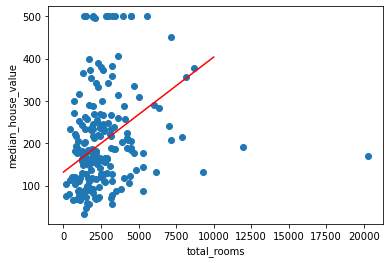

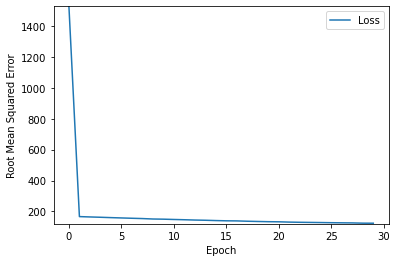

In [21]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Use the model to make predictions

In [34]:
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""

    batch = training_df[feature][10000:10000 + n]   # start from 10000 to 10000+n-1
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                       training_df[label][10000 + i],
                                       predicted_values[i][0] ))

predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             338
 1867     92             396
 2191     69             428
 1052     62             314
 1647     80             374
 2312    295             440
 1604    500             369
 1066    342             316
  338    118             243
 1604    128             369


## Try a different feature

The ```total_rooms``` feature had only a little predictive power. Would a different feature have greater predictive power? Try using ```population``` as the feature instead of ```total_rooms```.

Epoch 1/18


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


5667/5667 [==============================] - 10s 2ms/step - loss: 32070.8359 - root_mean_squared_error: 179.0833
Epoch 2/18
5667/5667 [==============================] - 9s 2ms/step - loss: 19950.6758 - root_mean_squared_error: 141.2469
Epoch 3/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18123.1504 - root_mean_squared_error: 134.6223
Epoch 4/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18117.8516 - root_mean_squared_error: 134.6026
Epoch 5/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18034.6562 - root_mean_squared_error: 134.2932
Epoch 6/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18262.1582 - root_mean_squared_error: 135.1376
Epoch 7/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18202.6094 - root_mean_squared_error: 134.9171
Epoch 8/18
5667/5667 [==============================] - 8s 1ms/step - loss: 17933.7285 - root_mean_squared_error: 133.9169
Epoch 9/18
5667/5667 [====

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


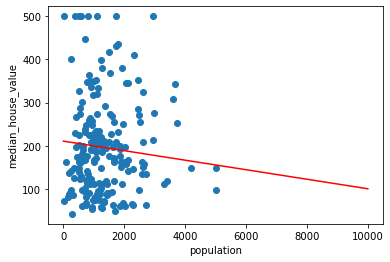

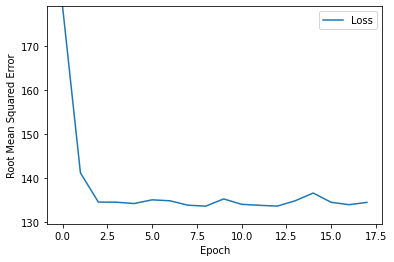

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             197
 1867     92             190
 2191     69             187
 1052     62             199
 1647     80             193
 2312    295             185
 1604    500             193
 1066    342             199
  338    118             207
 1604    128             193


In [36]:
my_feature = "population" # Pick a feature other than "total_rooms"
my_label="median_house_value"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

## Define a synthetic feature

Epoch 1/24


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


567/567 [==============================] - 2s 3ms/step - loss: 39090.2188 - root_mean_squared_error: 197.7125
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 19248.2832 - root_mean_squared_error: 138.7382
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 15160.0928 - root_mean_squared_error: 123.1263
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 14797.2510 - root_mean_squared_error: 121.6440
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 14575.4131 - root_mean_squared_error: 120.7287
Epoch 6/24
567/567 [==============================] - 2s 3ms/step - loss: 14458.3369 - root_mean_squared_error: 120.2428
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 14310.7764 - root_mean_squared_error: 119.6277
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 14229.8135 - root_mean_squared_error: 119.2888
Epoch 9/24
567/567 [=======================

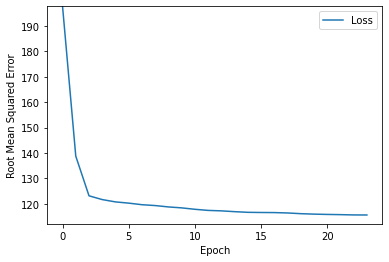

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             202
    2     69             196
    2     62             212
    1     80             188
    2    295             226
    2    500             211
    2    342             224
    4    118             289
    2    128             215
    2    187             225
    3     80             235
    2    112             226
    2     95             220
    2     69             212


In [40]:
# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

## Find feature(s) whose raw values correlate with the label

In [41]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
